# HuggingFace Pipelines

In [6]:
!pip install -q  datasets diffusers
!pip install soundfile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.2 MB/s eta 0:00:00a 0:00:01


In [7]:
# Imports

import torch
import os
from dotenv import load_dotenv
from huggingface_hub import login
from transformers import pipeline
import logging
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [8]:
# Constants

load_dotenv()


logging.getLogger("difussers").setLevel(logging.ERROR) # Suppress warnings from Hugging Face difussers library

hf_token = os.getenv('HF_TOKEN')
if hf_token:
    login(hf_token, add_to_git_credential=True)
else:
    print("Error: HF_TOKEN is not set.")

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


### Pipelines

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

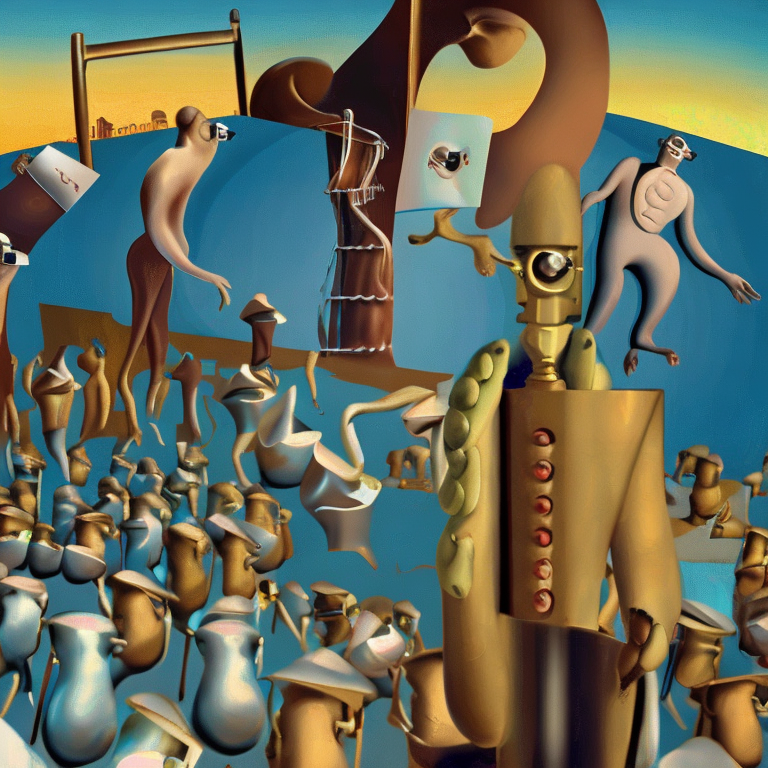

In [11]:
# Image Generation

image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float32, # Use float32 for better compatibility with CPU, GPU: float16
    use_safetensors=True,
    variant="fp16"
    ).to("cpu")

text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali"
image = image_gen(prompt=text).images[0]
image

In [12]:
# Audio Generation

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device=-1)

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation") #This dataset provides precomputed speaker embeddings for various voices.
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0) #Prepares a specific speaker embedding that will influence the tone, pitch, and timbre of the synthesized speech.

speech = synthesiser("Welcome to Nicole Data Science Portafolio", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"]) #Save audio to a file.
Audio("speech.wav")

Device set to use cpu
